In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from ipynb.fs.full.establishing_functions import call_sign_times, clean_data, calculate_counts, cahoots_call_signs # Will show an error bar, should work if ipynb library is installed

In [9]:
total_vs_cahoot = calculate_counts(clean_data, cahoots_call_signs)
# total_vs_cahoot["Percentage"] = round(total_vs_cahoot['Cahoots Calls'] / total_vs_cahoot['Total Calls'] * 100, 2)
total_vs_cahoot

,Call Time,Total Calls,Cahoots Calls,Percentage
0,2016-01-01,12926,414.0,3.202847
1,2016-02-01,13182,374.0,2.837202
2,2016-03-01,12872,424.0,3.293971
3,2016-04-01,12618,397.0,3.146299
4,2016-05-01,13061,454.0,3.475997
...,...,...,...,...
91,2023-08-01,12752,0.0,0.000000
92,2023-09-01,11842,0.0,0.000000
93,2023-10-01,11396,0.0,0.000000
94,2023-11-01,10812,0.0,0.000000


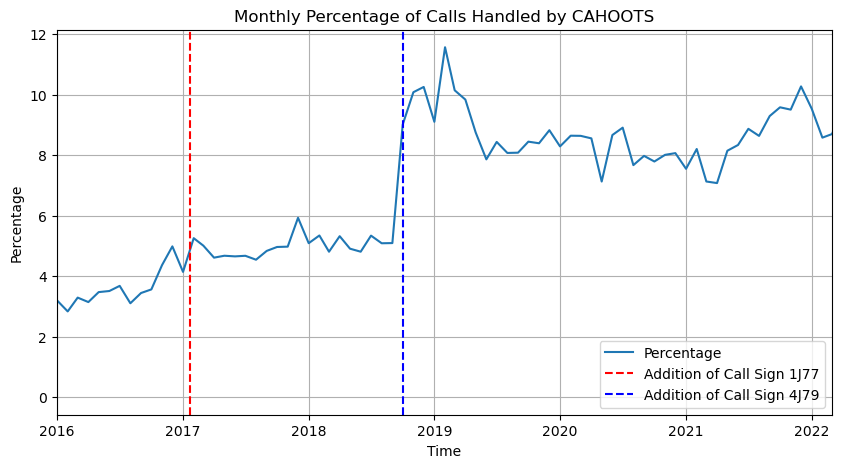

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(total_vs_cahoot['Call Time'], total_vs_cahoot['Percentage'], label="Percentage")
plt.title('Monthly Percentage of Calls Handled by CAHOOTS')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.grid(True)

plt.axvline(pd.to_datetime(call_sign_times['1J77']['First']), label='Addition of Call Sign 1J77', color='r', linestyle='--')
plt.axvline(pd.to_datetime(call_sign_times['4J79']['First']), label='Addition of Call Sign 4J79', color='b', linestyle='--')

plt.legend(loc="lower right")
# plt.legend(loc="upper left")

plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

In [11]:
results_1_shift = calculate_counts(clean_data, ["3J78"])
results_2_shift = calculate_counts(clean_data, ["3J78", "1J77"])
results_3_shift = calculate_counts(clean_data, ["3J78", "1J77", "4J79"])

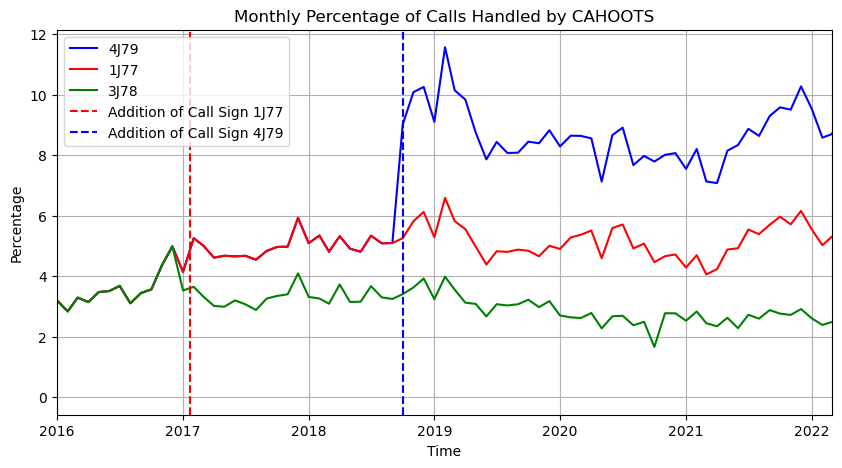

In [12]:
plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(results_3_shift['Call Time'], results_3_shift['Percentage'], color='b', label="4J79")
plt.plot(results_2_shift['Call Time'], results_2_shift['Percentage'], color='r', label="1J77")
plt.plot(results_1_shift['Call Time'], results_1_shift['Percentage'], color='g', label="3J78")
plt.axvline(pd.to_datetime(call_sign_times['1J77']['First']), label='Addition of Call Sign 1J77', color='r', linestyle='--')
plt.axvline(pd.to_datetime(call_sign_times['4J79']['First']), label='Addition of Call Sign 4J79', color='b', linestyle='--')

plt.title('Monthly Percentage of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Percentage')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc="upper left")


plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

Dig deeper into uptick in 2019. Added 2nd van? Less total police calls, increase in cahoots calls, or both?
Stick with 2022 data cutoff. 

Claims that 1J77 was added on 01-01-2017, I predict there was a slow ramp up (increase in capacity and hiring before adding another shift) 

In [13]:
results_3J78 = calculate_counts(clean_data, ["3J78"])
results_1J77 = calculate_counts(clean_data, ["1J77"])
results_4J79 = calculate_counts(clean_data, ["4J79"])

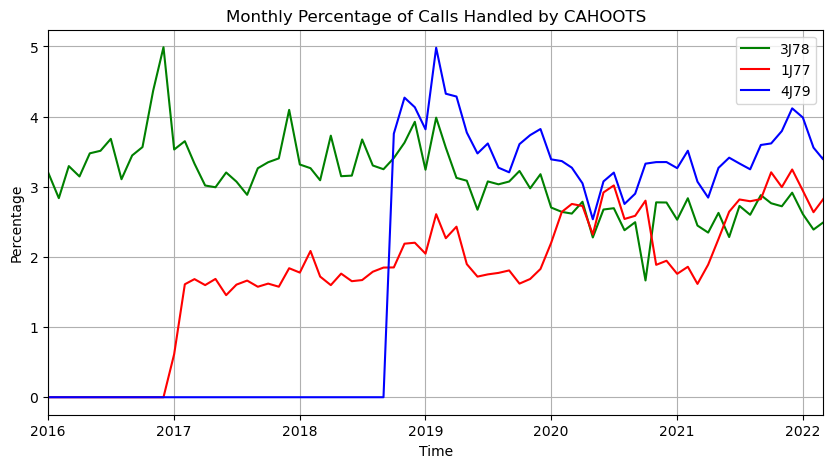

In [14]:

plt.figure(figsize=(10, 5))  # Set the figure size
    
plt.plot(results_3J78['Call Time'], results_3J78['Percentage'], label="3J78", color='g')
plt.plot(results_1J77['Call Time'], results_1J77['Percentage'], label="1J77", color='r')
plt.plot(results_4J79['Call Time'], results_4J79['Percentage'], label="4J79", color='b')
    
plt.title('Monthly Percentage of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Percentage')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc='upper right')
    
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])
    
plt.show()

## Observations from graph:
- Spike in 3J78 before 5-10 AM service hours were added. Why?
    - Possible ramp up in hiring before added hours?
    - Upgrades to handle longer van hours?
    - Started experimenting with shift before officially implementing it?
    - Going to look at same graph with count and see if it is similar.
    - If you're reading this and have any ideas please let me know!!
- 5 - 10 AM shift does handle fewer calls, in the beginning, however they balance out. Why?
- New van handles 1.35% more calls on average than older one. Is it faster? More comfortable? Better equipment? In all actuality though what changed to make it so consistently more efficient?
- Expected drop in 2020 (Covid) 


In [19]:
merged_old_vs_new_van = pd.merge(results_3J78[['Call Time', 'Percentage']], results_4J79[['Call Time', 'Percentage']],on='Call Time', how='left').dropna()
merged_old_vs_new_van = merged_old_vs_new_van.rename(columns={'Percentage_x': 'Percentage 3J78', 'Percentage_y': 'Percentage 4J79'})


In [35]:
mean_3J78 = merged_old_vs_new_van['Percentage 3J78'].mean()
mean_4J79 = merged_old_vs_new_van['Percentage 4J79'].mean()

percent_change = round(((abs(mean_4J79 - mean_3J78)) / mean_3J78) * 100, 2)
average_difference = round((abs(mean_4J79 - mean_3J78)), 2)
print(f"Percent Change: {percent_change}",
    f"Average difference: {average_difference}")

Percent Change: 35.02 Average difference: 0.85


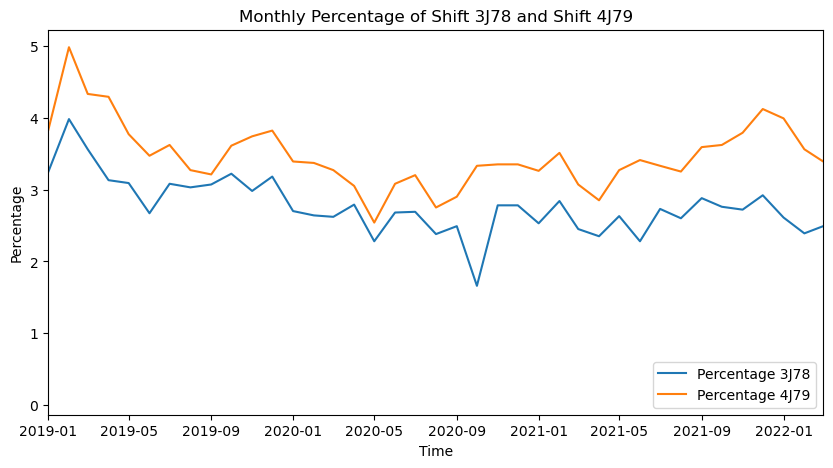

In [29]:
plt.figure(figsize=(10, 5))

plt.plot(merged_old_vs_new_van['Call Time'], merged_old_vs_new_van['Percentage 3J78'], label='Percentage 3J78')
plt.plot(merged_old_vs_new_van['Call Time'], merged_old_vs_new_van['Percentage 4J79'], label='Percentage 4J79')
plt.title('Monthly Percentage of Shift 3J78 and Shift 4J79')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.xlim([pd.to_datetime("2019"), pd.to_datetime("2022-3-1")])
plt.legend(loc="lower right")

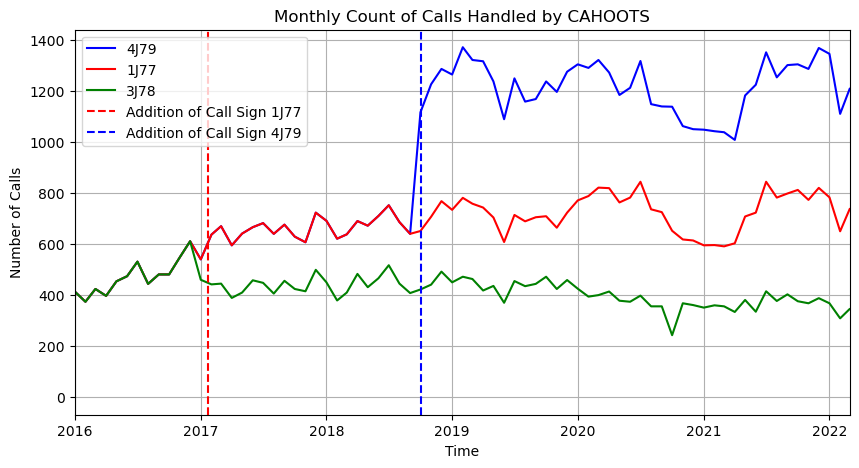

In [18]:
plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(results_3_shift['Call Time'], results_3_shift['Cahoots Calls'], color='b', label="4J79")
plt.plot(results_2_shift['Call Time'], results_2_shift['Cahoots Calls'], color='r', label="1J77")
plt.plot(results_1_shift['Call Time'], results_1_shift['Cahoots Calls'], color='g', label="3J78")
plt.axvline(pd.to_datetime(call_sign_times['1J77']['First']), label='Addition of Call Sign 1J77', color='r', linestyle='--')
plt.axvline(pd.to_datetime(call_sign_times['4J79']['First']), label='Addition of Call Sign 4J79', color='b', linestyle='--')

plt.title('Monthly Count of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Number of Calls')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc="upper left")


plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()